In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
#from sklearn.linear_model import LinearRegression
#from sklearn.metrics import r2_score

In [155]:
def grid(centros,angulo,nx,ny):

    raio_do_circulo = 7.5
    fig, ax = plt.subplots(figsize=(10, 10))

    alpha = 3.
    L1 = alpha*7.5e-3*2
    L2 = 154.e-3
    
    Grid_y = np.linspace(0,980,ny)
    Grid_x = np.linspace(-154,(L1+L2)*1000,nx)
    Grid = np.zeros((ny,nx))
    ax.plot([0, 0], [0, 98.], color='blue')[0],
    ax.plot([L1*1000, L1*1000], [0, 98.], color='blue')[0],
    ax.plot([0, -154], [98., 98. + 154 * np.tan(np.pi * angulo / 180)], color='blue')[0],
    ax.plot([L1*1000, (L1+L2)*1000], [98., 98. + 154 * np.tan(np.pi * angulo / 180)], color='blue')[0],
    ax.plot([(L1+L2)*1000, (L1+L2)*1000], [98. + 154 * np.tan(np.pi * angulo / 180), 2000], color='blue')[0]
    ax.plot([-154, -154], [98. + 154 * np.tan(np.pi * angulo / 180), 2000], color='blue')[0],
    s = 0
    for centro in centros:
        i,j = 0,0
        for i in range(len(Grid_x)):
            if(Grid_x[i] >= centro[0]):
                break
        for j in range(len(Grid_y)):
            if(Grid_y[j] >= centro[1]):
                break
        Grid[ny - j][nx -i] += centro[2]
        s +=centro[2]
        circulo = plt.Circle(centro[:2], raio_do_circulo, color='red', fill=False)
        ax.add_artist(circulo)
    cax = ax.imshow(Grid/s, cmap='viridis', interpolation='nearest', alpha=0.4,extent=[-154,(L1+L2)*1000,0,980])
    cbar = fig.colorbar(cax)
    plt.xlim(-164,200)
    plt.gca().set_aspect('equal', adjustable='box') 
    plt.show()

In [71]:

def plot(centros,angulo):

    raio_do_circulo = 7.5
    fig, ax = plt.subplots(figsize=(10, 10))

    alpha = 3.
    L1 = alpha*7.5e-3*2
    L2 = 154.e-3

    ax.plot([0, 0], [0, 98.], color='blue')[0],
    ax.plot([L1*1000, L1*1000], [0, 98.], color='blue')[0],
    ax.plot([0, -154], [98., 98. + 154 * np.tan(np.pi * angulo / 180)], color='blue')[0],
    ax.plot([L1*1000, (L1+L2)*1000], [98., 98. + 154 * np.tan(np.pi * angulo / 180)], color='blue')[0],
    ax.plot([(L1+L2)*1000, (L1+L2)*1000], [98. + 154 * np.tan(np.pi * angulo / 180), 2000], color='blue')[0]
    ax.plot([-154, -154], [98. + 154 * np.tan(np.pi * angulo / 180), 2000], color='blue')[0],

    for centro in centros:
        circulo = plt.Circle(centro, raio_do_circulo, color='red', fill=False)
        ax.add_artist(circulo)
    plt.ylim(0,980)
    plt.xlim(-154,300)
    plt.gca().set_aspect('equal', adjustable='box') 
    plt.show()


In [ ]:
a,b = 0.192417,0.368330
c,d = 0.199000,0.371924
plot((a*1000,b*1000),(c,d))

In [157]:
velocidades = np.loadtxt("results/30/velocidade/velocidade_3.00_0.00_0.00_0.51.dat",delimiter= ' ',dtype=float)

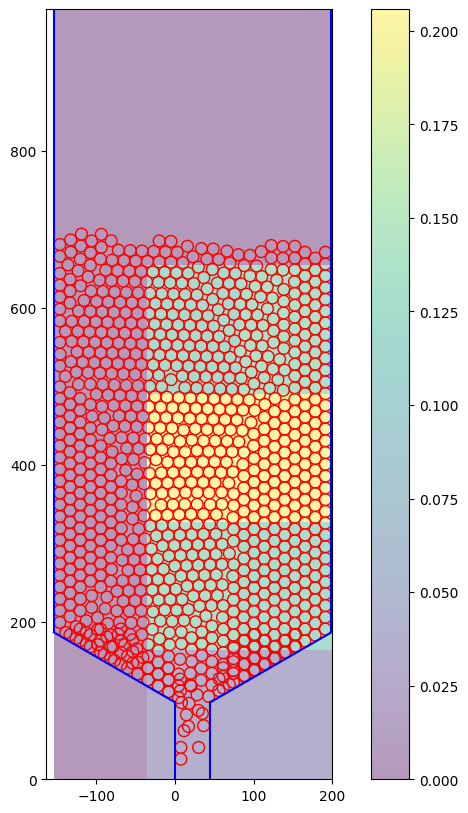

In [158]:
grid(velocidades[:1000,1:4]*1000,30,3,6) 

In [68]:
plt.hist(data[:,1],bins = 20)

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

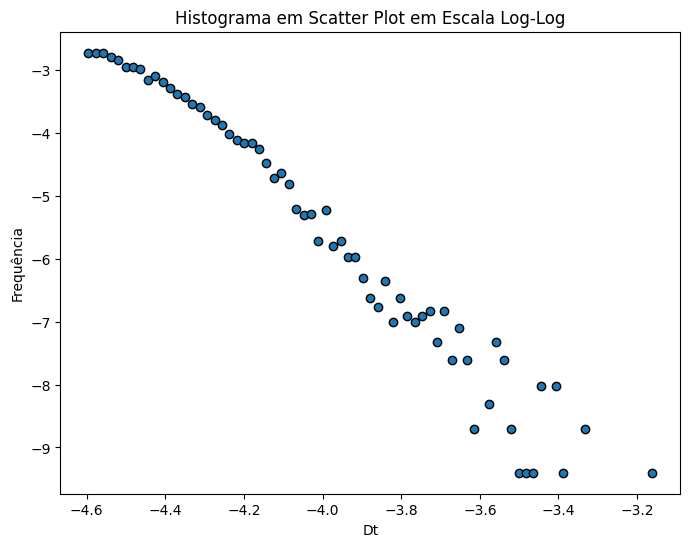

In [47]:
resultado = np.loadtxt("results/60/resultado_3.00_0.00_0.00.dat")
resultado = resultado[resultado[:,1] != 1]

bins = np.logspace(np.log10(min(resultado[:,0]+0.01)), np.log10(max(resultado[:,0])), 100)

hist, bins = np.histogram(resultado[:,0], bins=bins)

bin_centers = (bins[:-1] + bins[1:]) / 2

plt.figure(figsize=(8, 6))
hist = hist/np.sum(hist)
bin_centers = bin_centers[hist>0]
hist = hist[hist>0]

plt.scatter(np.log(bin_centers[:-1]), np.log(hist[:-1]), edgecolor='black')

plt.xlabel('Dt')
plt.ylabel('Frequência')
plt.title('Histograma em Scatter Plot em Escala Log-Log')
plt.show()

In [65]:
def regressao_linear(x, y):
    """
    Realiza uma regressão linear entre dois vetores e calcula o coeficiente de determinação R^2.

    Parâmetros:
    x (array-like): Vetor de entrada (variável independente).
    y (array-like): Vetor de saída (variável dependente).

    Retorna:
    model (LinearRegression): O modelo de regressão linear ajustado.
    coeficiente (float): Coeficiente angular da reta de regressão.
    intercepto (float): Intercepto da reta de regressão.
    r2 (float): Coeficiente de determinação R^2.
    """
    # Convertendo os vetores para arrays numpy e redimensionando x
    x = np.array(x).reshape(-1, 1)
    y = np.array(y)
    
    # Criando o modelo de regressão linear
    model = LinearRegression()
    
    # Ajustando o modelo aos dados
    model.fit(x, y)
    
    # Extraindo o coeficiente, intercepto e R^2
    coeficiente = model.coef_[0]
    intercepto = model.intercept_
    r2 = model.score(x, y)
    
    return model, coeficiente, intercepto, r2

In [162]:
modelo,coeficiente, intercepto,r2 = regressao_linear(np.log(bin_centers[:-1])[np.log(bin_centers[:-1])<-2], np.log(hist[:-1])[np.log(bin_centers[:-1])<-2])

In [163]:
modelo1,coeficiente1, intercepto1,r22 = regressao_linear(np.log(bin_centers[:-1])[np.log(bin_centers[:-1])>=-2.], np.log(hist[:-1])[np.log(bin_centers[:-1])>=-2.])

In [166]:
x = np.log(bin_centers[:-1])[np.log(bin_centers[:-1])<-2.]
x2 = np.log(bin_centers[:-1])[np.log(bin_centers[:-1])>=-2.]

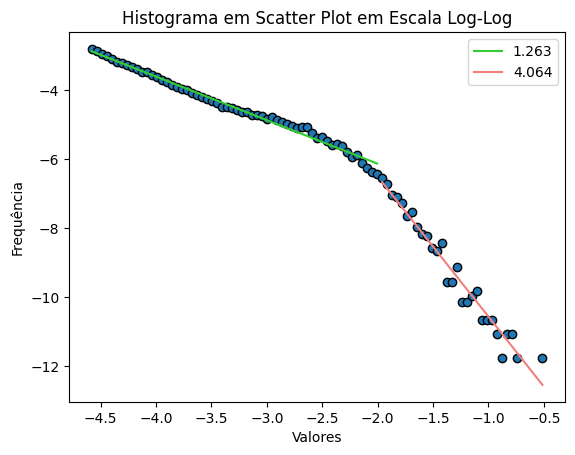

In [169]:
plt.scatter(np.log(bin_centers[:-1]), np.log(hist[:-1]), edgecolor='black')
plt.plot(x,modelo.predict(x.reshape(-1,1)),color = 'limegreen',label = f"{str(coeficiente)[1:6]}")
plt.plot(x2,modelo1.predict(x2.reshape(-1,1)),color = 'lightcoral',label = f"{str(coeficiente1)[1:6]}")
# Definindo a escala logarítmica para os eixos x e y
#plt.xscale('log')
#plt.yscale('log')

# Definindo os rótulos dos eixos
plt.xlabel('Valores')
plt.ylabel('Frequência')

# Adicionando um título
plt.title('Histograma em Scatter Plot em Escala Log-Log')
plt.legend()
# Mostrando o plot
plt.show()

(97.071, -9.654)


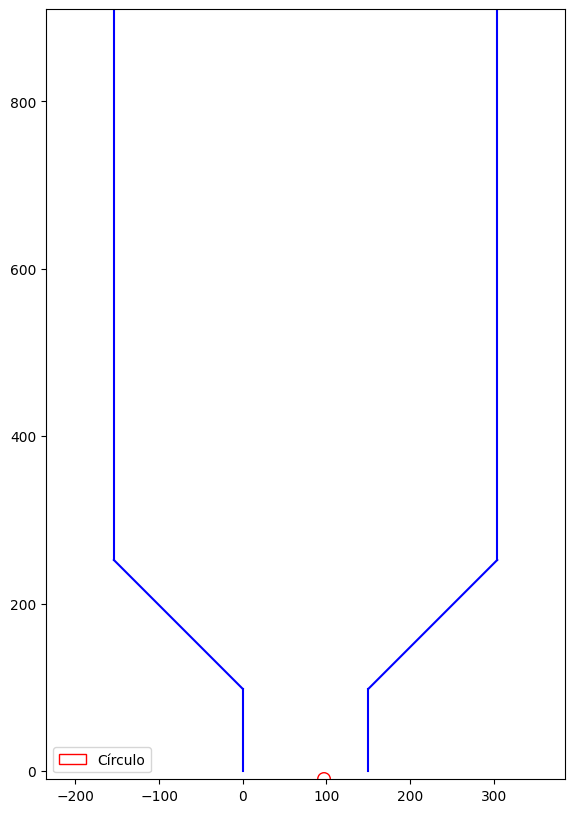

In [6]:
ponto_1,ponto_2 = (0.097071,-0.009654)
# Centro e raio do círculo
centro_do_circulo = (ponto_1*1000,ponto_2*1000)
plot(centro_do_circulo)

In [32]:
a = np.array([1,0,-210])
b = np.array([-0.138252,0.236484,1])

In [33]:
np.abs(np.dot(a,b))/(a[0]**2 + a[1]**2)*1000

210138.252

In [14]:
22238.47125264304486336187*1e-8

0.00022238471252643047

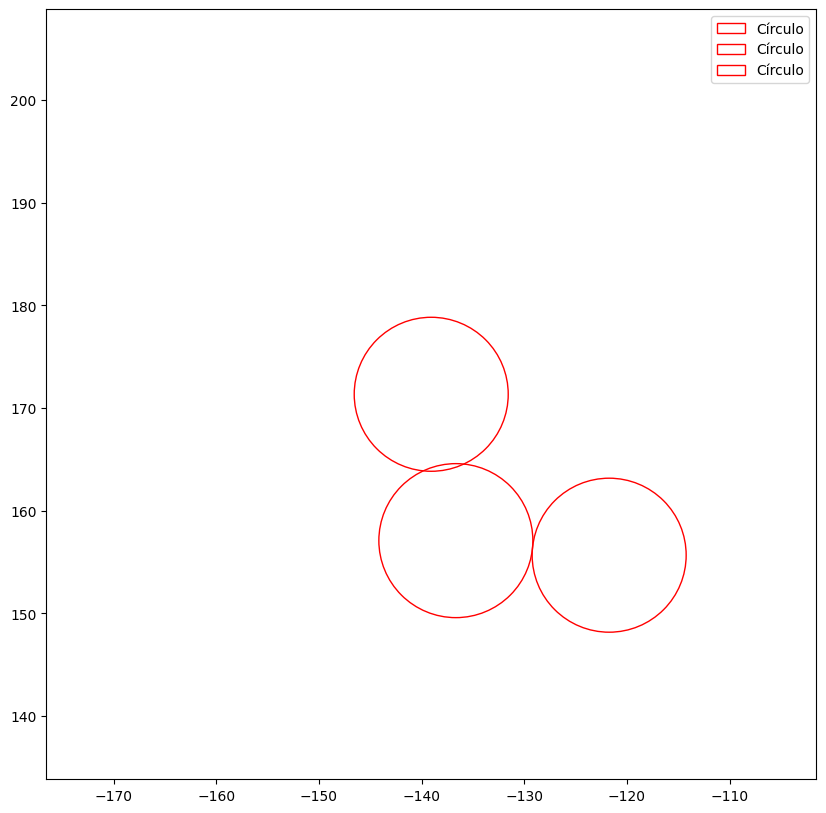

In [10]:
fig, ax = plt.subplots(figsize=(10, 10))

centro_do_circulo = (-136.655359,157.088587)
raio_do_circulo = 7.5

circulo = plt.Circle(centro_do_circulo, raio_do_circulo, color='red', fill=False, label='Círculo')
ax.add_artist(circulo)

centro_do_circulo = (-121.722580,155.670098)
raio_do_circulo = 7.5

circulo = plt.Circle(centro_do_circulo, raio_do_circulo, color='red', fill=False, label='Círculo')
ax.add_artist(circulo)

centro_do_circulo = (-139.054765,171.344140)
raio_do_circulo = 7.5

circulo = plt.Circle(centro_do_circulo, raio_do_circulo, color='red', fill=False, label='Círculo')
ax.add_artist(circulo)

# Configurar os limites dos eixos
ax.set_xlim(centro_do_circulo[0]- 5*raio_do_circulo,centro_do_circulo[0] + 5*raio_do_circulo)
ax.set_ylim(centro_do_circulo[1]- 5*raio_do_circulo,centro_do_circulo[1] + 5*raio_do_circulo)

# Adicionar grade e legenda
ax.legend()

# Mostrar a visualização
plt.gca().set_aspect('equal', adjustable='box')  # Assegurar proporção de aspecto igual
plt.show()

In [5]:
-138.000000*0 + 105.944552*-1+98.711941

-7.232611000000006

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import os
import imageio.v2 as imageio  # Importando a versão 2 especificamente
from tqdm import tqdm

# Carregar dados do arquivo TXT
data = np.loadtxt("./example.txt").T
df = {
    'Tempo': data[0],
    "id": data[1].astype(int),
    "x": data[2],
    "y": data[3],
}
dados = pd.DataFrame(df)
# Configurações iniciais do plot
fig, ax = plt.subplots()
ax.set_xlim(-304,304)
ax.set_ylim(0, 910)

# Lista para armazenar os frames
filenames = []
dt = 0.25/2
t = 0
count = 0
angulo = 45
while(t < dados["Tempo"].max()):
    ax.clear()
    ax.set_xlim(-324,324)
    ax.set_ylim(0, 910)

    ax.plot([0,0],[0,9.8], color='blue')
    ax.plot([150,150],[0,9.8], color='blue')

    ax.plot([0,-154],[9.8,9.8 + 154*np.tan(np.pi*angulo/180)], color='blue')
    ax.plot([150,304],[9.8,9.8 + 154*np.tan(np.pi*angulo/180)], color='blue')
    ax.plot([-154,-154],[9.8 + 154*np.tan(np.pi*angulo/180),910], color='blue')
    ax.plot([304,304],[9.8 + 154*np.tan(np.pi*angulo/180),910], color='blue')

    data_int_time = dados[dados["Tempo"] == t]
    for particula in data_int_time[["x",'y']].values:
        if(particula[1] > 0):
            ax.scatter(particula[0], particula[1], color='red')  # Destaca a posição atual
    
    # Salvar o frame
    #ax.text(0.05, 0.95, f'Time: {current_time:.2f}', transform=ax.transAxes, fontsize=12,verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    filename = f'./frames/frame_{count}.png'
    plt.gca().set_aspect('equal', adjustable='box')  # Assegurar proporção de aspecto igual
    plt.savefig(filename)
    filenames.append(filename)

    t += dt
    count += 1

# Criar GIF
with imageio.get_writer('./frames/particula_movimento.gif', mode='I', duration=0.05) as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)
        # Remover os arquivos de frame para limpeza
        os.remove(filename)

plt.close()


  0%|          | 0/101 [00:00<?, ?it/s]

100%|██████████| 101/101 [00:11<00:00,  9.05it/s]
